<a href="https://colab.research.google.com/github/apexsindh666/lung-cancer-detection/blob/main/lungcancerdetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/lung-and-colon-cancer-histopathological-images")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'lung-and-colon-cancer-histopathological-images' dataset.
Path to dataset files: /kaggle/input/lung-and-colon-cancer-histopathological-images


In [4]:
from google.colab import files
files.upload()   # Select kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shanmukhanarayana","key":"46881ac56d341ac9ca65a4e392059ae8"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
import os, zipfile

# Path to cache in Google Drive
cache_path = "/content/drive/MyDrive/ColabCache/lung_colon_dataset"
kaggle_dataset = "andrewmvd/lung-and-colon-cancer-histopathological-images"

def download_from_kaggle():
    print("⬇️ Downloading dataset from Kaggle...")
    os.system(f"kaggle datasets download -d {kaggle_dataset} -p /content")

    zip_file = "/content/lung-and-colon-cancer-histopathological-images.zip"
    if os.path.exists(zip_file):
        print("📦 Unzipping dataset...")
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(cache_path)
        os.remove(zip_file)
        print("✅ Dataset cached at:", cache_path)
    else:
        print("❌ Download failed. Check Kaggle dataset name or API key.")

# Check cache first
if not os.path.exists(cache_path):
    os.makedirs(cache_path, exist_ok=True)
    download_from_kaggle()
else:
    print("✅ Using cached dataset at:", cache_path)

# Final dataset path
DATASET_PATH = cache_path
print("📂 Dataset ready at:", DATASET_PATH)


⬇️ Downloading dataset from Kaggle...
📦 Unzipping dataset...
✅ Dataset cached at: /content/drive/MyDrive/ColabCache/lung_colon_dataset
📂 Dataset ready at: /content/drive/MyDrive/ColabCache/lung_colon_dataset


In [6]:
import os

for root, dirs, files in os.walk("/content/drive/MyDrive/ColabCache/lung_colon_dataset"):
    print("📂", root)
    if dirs:
        print("   Subfolders:", dirs[:5])
    if files:
        print("   Files:", files[:5])
    print()
    break  # remove this break if you want full tree


📂 /content/drive/MyDrive/ColabCache/lung_colon_dataset
   Subfolders: ['lung_colon_image_set']



In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [8]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.device("cuda" if torch.cuda.is_available() else "cpu"))


CUDA available: False
Device: cpu


In [7]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),   # instead of 224x224
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])


In [11]:
import os

for root, dirs, files in os.walk(DATASET_PATH):
    print("📂", root)
    if dirs:
        print("   Subfolders:", dirs[:5])
    if files:
        print("   Files:", files[:5])
    print()


📂 /content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set
   Subfolders: ['colon_image_sets', 'lung_image_sets']

📂 /content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set/colon_image_sets
   Subfolders: ['colon_aca', 'colon_n']

📂 /content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set/colon_image_sets/colon_aca
   Files: ['colonca1.jpeg', 'colonca10.jpeg', 'colonca100.jpeg', 'colonca1000.jpeg', 'colonca1001.jpeg']

📂 /content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set/colon_image_sets/colon_n
   Files: ['colonn1.jpeg', 'colonn10.jpeg', 'colonn100.jpeg', 'colonn1000.jpeg', 'colonn1001.jpeg']

📂 /content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set/lung_image_sets
   Subfolders: ['lung_aca', 'lung_n', 'lung_scc']

📂 /content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set/lung_image_sets/lung_aca
   Files: ['lungaca1.jpeg', 'lungaca10.jpeg', 'lungaca100.jpeg', 'lungaca1000.j

In [9]:
from torchvision.datasets import DatasetFolder
from PIL import Image

def pil_loader(path):
    return Image.open(path).convert('RGB')

full_dataset = DatasetFolder(
    root=DATASET_PATH,
    loader=pil_loader,
    extensions=('jpeg', 'jpg', 'png'),
    transform=transform
)


In [11]:
import shutil
import os

base_path = "/content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set"

# Move colon subfolders
for folder in ["colon_aca", "colon_n"]:
    src = os.path.join(base_path, "colon_image_sets", folder)
    dst = os.path.join(base_path, folder)
    shutil.move(src, dst)

# Move lung subfolders
for folder in ["lung_aca", "lung_n", "lung_scc"]:
    src = os.path.join(base_path, "lung_image_sets", folder)
    dst = os.path.join(base_path, folder)
    shutil.move(src, dst)

# Remove old parent folders if empty
os.rmdir(os.path.join(base_path, "colon_image_sets"))
os.rmdir(os.path.join(base_path, "lung_image_sets"))

print("✅ Folders flattened successfully!")


✅ Folders flattened successfully!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# ✅ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ✅ Paths
DATASET_PATH = "/content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set"

# ✅ Transformations (resize + normalize for pretrained model)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load dataset
full_dataset = datasets.ImageFolder(DATASET_PATH, transform=transform)
print("Classes:", full_dataset.classes)

# ✅ Train/Test Split
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"✅ Dataset: {len(train_dataset)} training, {len(test_dataset)} testing samples")

# ✅ Pretrained Model (MobileNetV2)
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)

# Replace final layer with 5-class output
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 5)

model = model.to(device)

# ✅ Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Training Loop
EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_acc:.2f}%")

# ✅ Evaluation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"✅ Test Accuracy: {100 * correct / total:.2f}%")


Using device: cpu
Classes: ['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']
✅ Dataset: 2000 train, 500 test samples
Batch 0/63, Loss: 1.7701
Batch 50/63, Loss: 1.4679
Epoch 1/10 completed, Training Accuracy: 43.10%

Batch 0/63, Loss: 1.2034
Batch 50/63, Loss: 0.9599
Epoch 2/10 completed, Training Accuracy: 77.20%

Batch 0/63, Loss: 0.5840
Batch 50/63, Loss: 0.7408
Epoch 3/10 completed, Training Accuracy: 81.95%

Batch 0/63, Loss: 0.6633
Batch 50/63, Loss: 0.6159
Epoch 4/10 completed, Training Accuracy: 85.65%

Batch 0/63, Loss: 0.5325
Batch 50/63, Loss: 0.5282
Epoch 5/10 completed, Training Accuracy: 87.20%

Batch 0/63, Loss: 0.6747
Batch 50/63, Loss: 0.4802
Epoch 6/10 completed, Training Accuracy: 86.90%

Batch 0/63, Loss: 0.3250
Batch 50/63, Loss: 0.4505
Epoch 7/10 completed, Training Accuracy: 88.30%

Batch 0/63, Loss: 0.4002
Batch 50/63, Loss: 0.3874
Epoch 8/10 completed, Training Accuracy: 90.50%

Batch 0/63, Loss: 0.5026
Batch 50/63, Loss: 0.3753
Epoch 9/10 completed, T

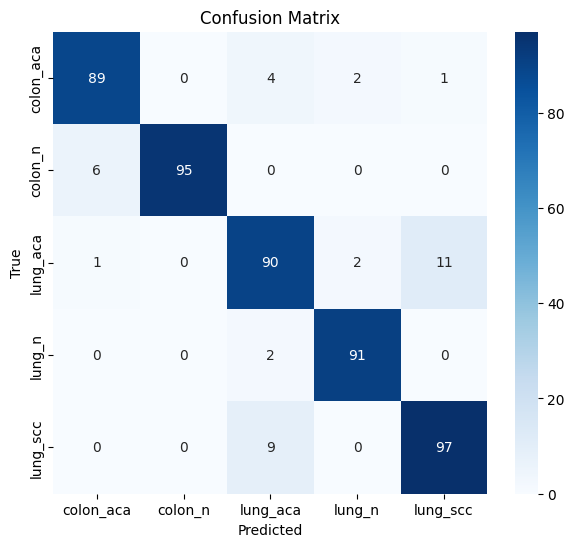

Classification Report:
              precision    recall  f1-score   support

   colon_aca       0.93      0.93      0.93        96
     colon_n       1.00      0.94      0.97       101
    lung_aca       0.86      0.87      0.86       104
      lung_n       0.96      0.98      0.97        93
    lung_scc       0.89      0.92      0.90       106

    accuracy                           0.92       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.92      0.92       500

✅ Model saved as cancer_detection_mobilenetv2.pth


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# -------------------------
# 1️⃣ Device
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------
# 2️⃣ Transformations
# -------------------------
transform = transforms.Compose([
    transforms.Resize((96, 96)),  # smaller for CPU
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# -------------------------
# 3️⃣ Dataset
# -------------------------
DATASET_PATH = "/content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set"
full_dataset = datasets.ImageFolder(DATASET_PATH, transform=transform)
print("Classes:", full_dataset.classes)

# Train/Test split
train_size = int(0.8*len(full_dataset))
test_size = len(full_dataset)-train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# -------------------------
# 4️⃣ Optional: small subset for quick CPU test
# -------------------------
train_subset, _ = random_split(train_dataset, [2000, len(train_dataset)-2000])
test_subset, _ = random_split(test_dataset, [500, len(test_dataset)-500])

train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=32, shuffle=False)

print(f"✅ Dataset: {len(train_subset)} train, {len(test_subset)} test samples")

# -------------------------
# 5️⃣ Model
# -------------------------
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)

# Freeze feature extractor
for param in model.features.parameters():
    param.requires_grad = False

# Replace classifier for 5 classes
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 5)
model = model.to(device)

# -------------------------
# 6️⃣ Loss & Optimizer
# -------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier[1].parameters(), lr=0.0001)

# -------------------------
# 7️⃣ Training Loop (with batch progress)
# -------------------------
EPOCHS = 10  # CPU-friendly

for epoch in range(EPOCHS):
    model.train()
    running_loss, correct, total = 0,0,0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs,1)
        correct += (preds==labels).sum().item()
        total += labels.size(0)

        if batch_idx % 50 == 0:
            print(f"Batch {batch_idx}/{len(train_loader)}, Loss: {running_loss/(batch_idx+1):.4f}")

    train_acc = 100*correct/total
    print(f"Epoch {epoch+1}/{EPOCHS} completed, Training Accuracy: {train_acc:.2f}%\n")

# -------------------------
# 8️⃣ Evaluation
# -------------------------
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs,1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=full_dataset.classes,
            yticklabels=full_dataset.classes, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=full_dataset.classes))

# -------------------------
# 9️⃣ Save Model
# -------------------------
torch.save(model.state_dict(), "cancer_detection_mobilenetv2.pth")
print("✅ Model saved as cancer_detection_mobilenetv2.pth")


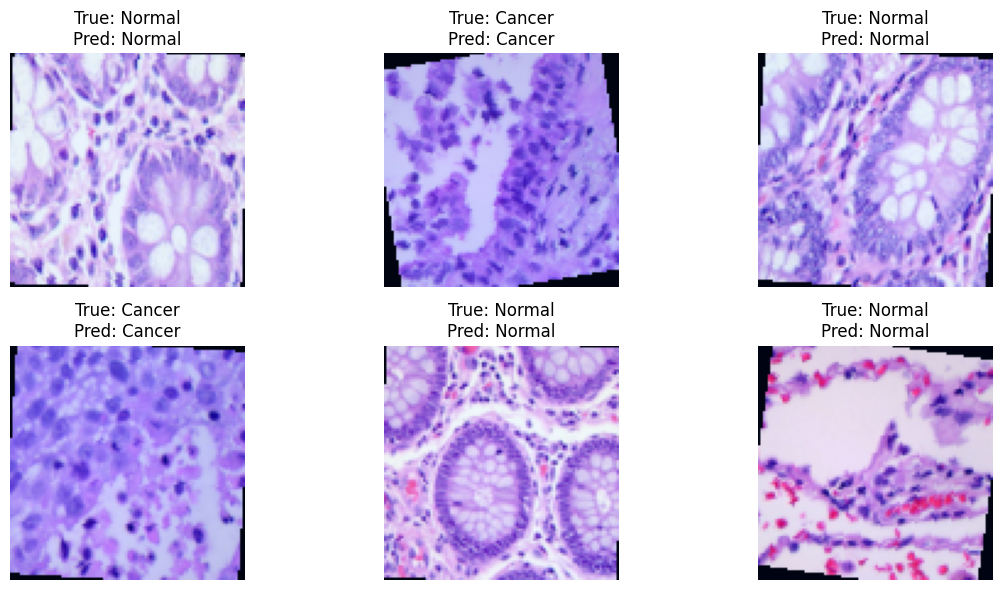

In [18]:
def show_sample_predictions_cancer(model, test_loader, class_names, num_images=6):
    model.eval()
    images_shown = 0
    plt.figure(figsize=(12, 6))

    cancer_map = {
        'colon_aca': 'Cancer',
        'colon_n': 'Normal',
        'lung_aca': 'Cancer',
        'lung_n': 'Normal',
        'lung_scc': 'Cancer'
    }

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for i in range(images.size(0)):
                if images_shown >= num_images:
                    break
                images_shown += 1

                img = images[i].cpu().permute(1, 2, 0).numpy()
                img = (img - img.min()) / (img.max() - img.min())  # normalize

                plt.subplot(2, num_images//2, images_shown)
                plt.imshow(img)

                true_class = class_names[labels[i]]
                pred_class = class_names[preds[i]]

                plt.title(f"True: {cancer_map[true_class]}\nPred: {cancer_map[pred_class]}")
                plt.axis("off")

            if images_shown >= num_images:
                break

    plt.tight_layout()
    plt.show()

# Run it
show_sample_predictions_cancer(model, test_loader, full_dataset.classes, num_images=6)


Using device: cpu
✅ Model loaded


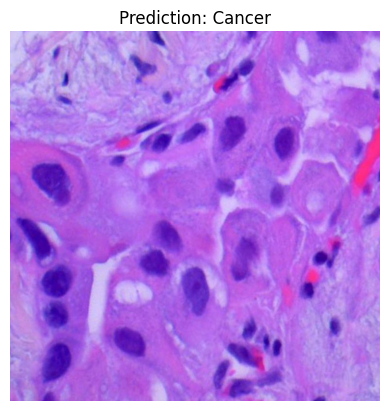

✅ Image: lungaca1.jpeg --> Cancer


In [22]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# -------------------------
# 1️⃣ Device
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------
# 2️⃣ Load trained model
# -------------------------
# Number of classes = 5
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
for param in model.features.parameters():
    param.requires_grad = False
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 5)
model.load_state_dict(torch.load("cancer_detection_mobilenetv2.pth", map_location=device))
model = model.to(device)
model.eval()
print("✅ Model loaded")

# -------------------------
# 3️⃣ Define class mapping: Cancer / Normal
# -------------------------
class_names = ['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']
cancer_map = {
    'colon_aca': 'Cancer',
    'colon_n': 'Normal',
    'lung_aca': 'Cancer',
    'lung_n': 'Normal',
    'lung_scc': 'Cancer'
}

# -------------------------
# 4️⃣ Image transform (same as training)
# -------------------------
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# -------------------------
# 5️⃣ Prediction function
# -------------------------
def predict_cancer(model, img_path):
    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)  # add batch dimension

    with torch.no_grad():
        outputs = model(img_tensor)
        _, pred = torch.max(outputs, 1)
        class_name = class_names[pred.item()]
        result = cancer_map[class_name]

    return result, img

# -------------------------
# 6️⃣ Visualize single image prediction
# -------------------------
def show_prediction(img_path):
    result, img = predict_cancer(model, img_path)
    plt.imshow(img)
    plt.title(f"Prediction: {result}")
    plt.axis("off")
    plt.show()
    print(f"✅ Image: {os.path.basename(img_path)} --> {result}")

# -------------------------
# 7️⃣ Example usage (single image)
# -------------------------
img_path = "/content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set/lung_aca/lungaca1.jpeg"
show_prediction(img_path)

# -------------------------
# 8️⃣ Optional: Predict multiple images in a folder
# -------------------------
def predict_folder(model, folder_path):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(folder_path, filename)
            result, _ = predict_cancer(model, img_path)
            print(f"{filename} --> {result}")

# Example: predict_folder(model, "/content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set/lung_aca")


Using device: cpu
✅ Model loaded


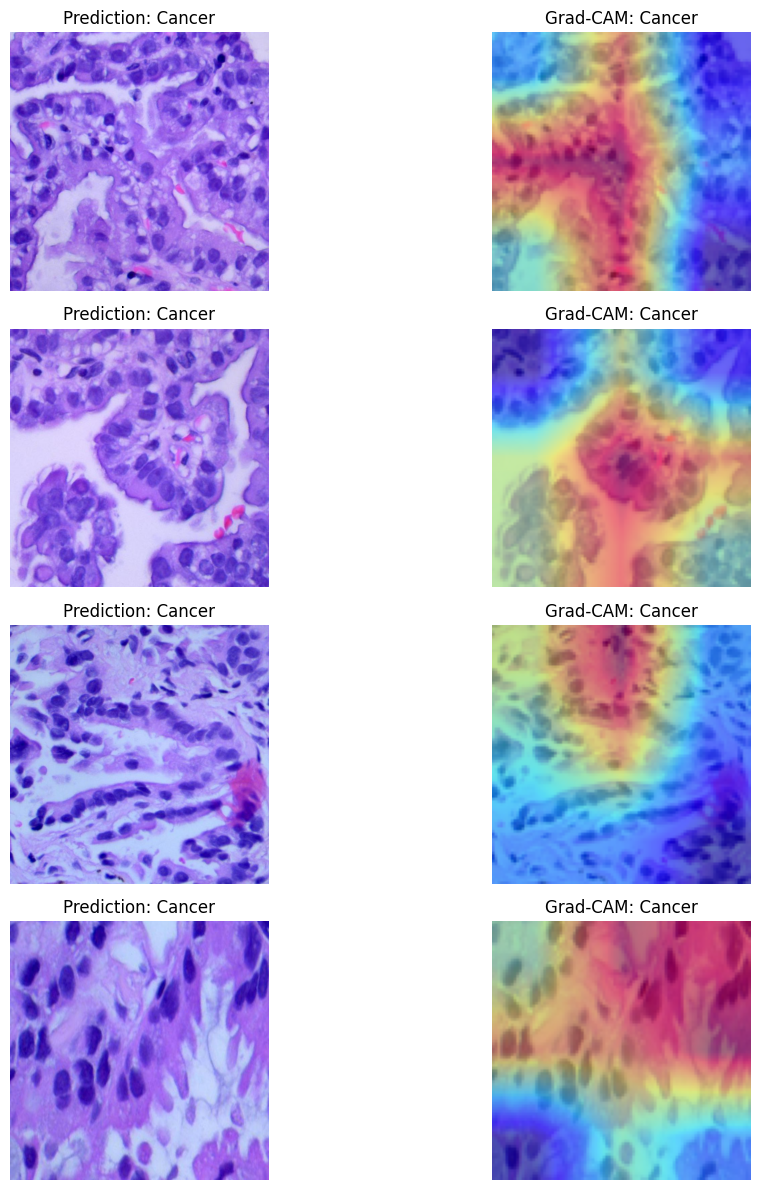

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2  # for resizing heatmap

# -------------------------
# 1️⃣ Device
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------
# 2️⃣ Load trained MobileNetV2 model
# -------------------------
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
for param in model.features.parameters():
    param.requires_grad = False
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 5)
model.load_state_dict(torch.load("cancer_detection_mobilenetv2.pth", map_location=device))
model = model.to(device)
model.eval()
print("✅ Model loaded")

# -------------------------
# 3️⃣ Class mapping: Cancer / Normal
# -------------------------
class_names = ['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']
cancer_map = {
    'colon_aca': 'Cancer',
    'colon_n': 'Normal',
    'lung_aca': 'Cancer',
    'lung_n': 'Normal',
    'lung_scc': 'Cancer'
}

# -------------------------
# 4️⃣ Transform
# -------------------------
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# -------------------------
# 5️⃣ Grad-CAM helper
# -------------------------
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def __call__(self, x, class_idx=None):
        x.requires_grad = True
        output = self.model(x)
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()
        self.model.zero_grad()
        loss = output[0, class_idx]
        loss.backward()
        if self.gradients is None or self.activations is None:
            raise RuntimeError("Gradients or activations not captured! Check hook layer.")
        weights = self.gradients.mean(dim=[2,3], keepdim=True)
        cam = F.relu((weights * self.activations).sum(dim=1)).squeeze().cpu().numpy()
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-8)
        return cam, class_idx

# -------------------------
# 6️⃣ Last conv block for MobileNetV2
# -------------------------
target_layer = model.features[-1]
grad_cam = GradCAM(model, target_layer)

# -------------------------
# 7️⃣ Show Grad-CAM for images
# -------------------------
def show_gradcam_for_images(image_folder, num_images=4):
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder)
                   if f.lower().endswith((".jpg",".jpeg",".png"))]
    selected = random.sample(image_paths, min(num_images, len(image_paths)))
    plt.figure(figsize=(12, num_images*3))

    for i, img_path in enumerate(selected):
        img = Image.open(img_path).convert('RGB')
        input_tensor = transform(img).unsqueeze(0).to(device)

        cam, class_idx = grad_cam(input_tensor)
        pred_class = class_names[class_idx]
        pred_label = cancer_map[pred_class]

        # Original image
        plt.subplot(num_images, 2, 2*i+1)
        plt.imshow(img)
        plt.title(f"Prediction: {pred_label}")
        plt.axis('off')

        # Overlay Grad-CAM heatmap
        plt.subplot(num_images, 2, 2*i+2)
        img_resized = np.array(img.resize((96,96)))/255
        heatmap_resized = cv2.resize(cam, (img_resized.shape[1], img_resized.shape[0]))
        heatmap_color = plt.cm.jet(heatmap_resized)[:, :, :3]
        overlay = 0.5 * img_resized + 0.5 * heatmap_color
        overlay = np.clip(overlay, 0, 1)
        plt.imshow(overlay)
        plt.title(f"Grad-CAM: {pred_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# -------------------------
# 8️⃣ Example usage
# -------------------------
image_folder = "/content/drive/MyDrive/ColabCache/lung_colon_dataset/lung_colon_image_set/lung_aca"
show_gradcam_for_images(image_folder, num_images=4)
